# Who Survived the Titanic Disaster?

## 1. Introduction

In this titanic example we will use decision trees. The main advantage of this model is that a human being can easily 
understand and reproduce the sequence of decisions (especially if the number of attributes is small) taken to predict the target class of a new instance.

This is very important for tasks such as medical diagnosis or credit approval, where we want to show a reason for the 
decision, rather than just saying this is what the training data suggests (which is, by definition, what every supervised 
learning method does).

The problem we would like to solve is to determine if a Titanic's passenger would have survived, given age, passenger class, 
and sex. Why these features? 

Very specific features or attributes (such as name in our case) could result in overfitting (consider a tree that just asks 
if the name is X, she survived); attributes where there is a small number of instances with each value present a similar 
problem. They might not be useful for generalization. We will use class, age, and sex because a priori, we expect them to 
have possibly influenced the passenger's survival.

Each instance in the dataset has the following form:

     "1","1st",1,"Allen, Miss Elisabeth Walton",29.0000,"Southampton","St Louis, MO","B-5","24160 L221","2","female"
     
Note that the raw data consists largely of strings. To apply machine learning algo's it has to be converted to numerical data first (at least the columns that are of interest)!

## 2. Prepare Dataset with Pandas 

Pandas is a Python module to works with the so-called dataframe concept (a bit like in R - rows are observations, columns refer to the features).

A dataframe is essentially a two-dimensional labeled data structure where
columns can potentially include different data types and each row represents an
obervation).

More details, see: https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii 

### 2.1. Load Dataset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# For .read_csv, always use header=0 when you know row 0 is the header row
df_titanic = pd.read_csv('data/ML07_Titanic.csv', header = 0)

# Show the first 3 observations (with column names) ...
df_titanic.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male


In [2]:
# ... and the last 4 observations 
df_titanic.tail(4)

# Note: We have missing values (some features are not available), a usual problem with datasets.

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
1309,1310,3rd,0,"Zakarian, Mr Maprieder",NaN,NaN,NaN,NaN,NaN,NaN,male
1310,1311,3rd,0,"Zenn, Mr Philip",NaN,NaN,NaN,NaN,NaN,NaN,male
1311,1312,3rd,0,"Zievens, Rene",NaN,NaN,NaN,NaN,NaN,NaN,female
1312,1313,3rd,0,"Zimmerman, Leo",NaN,NaN,NaN,NaN,NaN,NaN,male


### 2.2. Investigate Dataset

In [3]:
# How does Pandas interpret the data (using the csv reader)?
df_titanic.dtypes

# Note: Pandas is able to infer numerical types whenever it can detect them.

row.names      int64
pclass        object
survived       int64
name          object
age          float64
embarked      object
home.dest     object
room          object
ticket        object
boat          object
sex           object
dtype: object

In [4]:
# There are two more very valuable commands to learn on a dataframe, the first is:
df_titanic.info()

# Note: This gives a lot of useful info! 
# You can see immediately we have 1313 entries (rows), and for some (name, sex, pclass, survived) of the variables we 
# have complete values. Room (or cabin) is only known in 77 cases. Missing values is a very common problem with 
# datasets!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 123.1+ KB


In [5]:
# ... and the second is:
df_titanic.describe()

# Also very useful: Pandas has taken all of the numerical columns and quickly calculated the mean, std, minimum 
# and maximum value. Convenient! But also a word of caution: we know there are a lot of missing values in Age, for example. 
# How did pandas deal with that? It must have left out any nulls from the calculation. 
# So if we start quoting the "average age on the Titanic" we need to caveat how we derived that number.

,row.names,survived,age
count,1313.000000,1313.000000,633.000000
mean,657.000000,0.341965,31.194181
std,379.174762,0.474549,14.747525
min,1.000000,0.000000,0.166700
25%,329.000000,0.000000,21.000000
50%,657.000000,0.000000,30.000000
75%,985.000000,1.000000,41.000000
max,1313.000000,1.000000,71.000000


In [6]:
# Syntax in Pandas that allows for referring to specific columns is easy to remember. Slice the first 10 rows of the 
# 'age' column. In pandas this is:
df_titanic['age'][:10]

0    29.0000
1     2.0000
2    30.0000
3    25.0000
4     0.9167
5    47.0000
6    63.0000
7    39.0000
8    58.0000
9    71.0000
Name: age, dtype: float64

In [7]:
# What kind of object is this:     
type(df_titanic['age'])

# Note: Single column is neither an numpy array, nor a pandas dataframe but rather a pandas-specific object called 
# data Series.

pandas.core.series.Series

In [8]:
# Get the mean value of the age column:
df_titanic['age'].mean()

# Note: That matches what was reported in df_titanic.describe().

31.19418104265403

In [9]:
# The next thing we'd like to do is look at more specific subsets of the dataframe. Again pandas makes this very 
# convenient to write. Pass it a [ list ] of the columns desired:
df_titanic[ ['sex', 'pclass', 'age'] ]

,sex,pclass,age
0,female,1st,29.0000
1,female,1st,2.0000
2,male,1st,30.0000
3,female,1st,25.0000
4,male,1st,0.9167
5,male,1st,47.0000
6,female,1st,63.0000
7,male,1st,39.0000
8,female,1st,58.0000
9,male,1st,71.0000


In [10]:
# First look at all of the missing 'age' values, because we will need to address them in our model if we hope to use 
# all the data for more advanced algorithms. To filter for missing values, use:
df_titanic[df_titanic['age'].isnull()][['sex', 'pclass', 'age']].head(6)

# Note: Here the only thing we did was print all 680 cases, but the same syntax can be used later if we take action on 
# them.

,sex,pclass,age
12,female,1st,NaN
13,male,1st,NaN
14,male,1st,NaN
29,male,1st,NaN
32,male,1st,NaN
35,male,1st,NaN


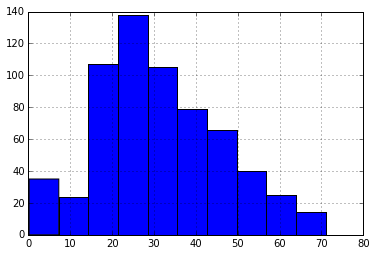

In [11]:
# Before we finish the initial investigation by hand, let's use one other convenience function of pandas to derive a 
# histogram of any numerical column. The histogram function is really a shortcut to the more powerful features of the 
# matplotlib/pylab packages, so let's be sure that's imported. Type the following:
import pylab as pyl
df_titanic['age'].hist();
pyl.show()

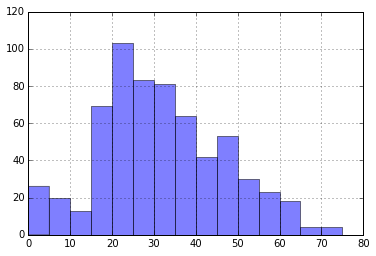

In [12]:
# Inside the parentheses of .hist(), you can also be more explicit about options of this function. Before you invoke 
# it, you can also be explicit that you are dropping the missing values of age:
df_titanic['age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
pyl.show()

## 3. Data Munging

### 3.1. Transform the Data 

In [13]:
# Transform the values in the dataframe into the shape we need for machine learning. First of all, it's hard to run 
# analysis on the string values of "male" and "female". 
# Let's store our transformation in a new column, so the original sex isn't changed.
# In Pandas, adding a column is as easy as naming it and passing it new values (in this arbitrarily a 4).
df_titanic['Gender'] = 4
df_titanic.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender
0,1,1st,1,"Allen, Miss Elisabeth Walton",29,Southampton,"St Louis, MO",B-5,24160 L221,2,female,4
1,2,1st,0,"Allison, Miss Helen Loraine",2,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,4
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,4


In [14]:
# Let's transform Gender into values of 0 and 1's. We have a precedent of analyzing the women first, so let's decide 
# female = 0 and male = 1. 
df_titanic['Gender'] = df_titanic['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_titanic.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender
0,1,1st,1,"Allen, Miss Elisabeth Walton",29,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0
1,2,1st,0,"Allison, Miss Helen Loraine",2,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1


In [15]:
# Do the same for passenger class, make it numeric, in a new column PClass. 
df_titanic['PClass'] = df_titanic['pclass'].map( {'1st': 1, '2nd': 2, '3rd' : 3} ).astype(int)
df_titanic.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender,PClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1
1,2,1st,0,"Allison, Miss Helen Loraine",2,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,1


### 3.2. Deal with Missing Values

Now it's time to deal with the missing values of age! Why? Simply because most machine learning will need a complete set of 
values in that column to use it. By filling it in with guesses, we'll be introducing some noise into a model, but if we can 
keep our guesses reasonable, some of them should be close to the historical truth (whatever it was...), and the overall 
predictive power of age might still make a better model than before. 

In [16]:
# We know the average [known] age of all passengers is 31.2 - we could fill in the null values with that. But may be 
# the median would be better? (to reduce the influence of a few rare 70- and 80-year olds?) The age histogram did seem 
# positively skewed. These are the kind of decisions you make as you create your models (e.g. in a Kaggle competition).

# For now let's decide to be more sophisticated, that we want to use the age that was typical in each passenger class 
# (and the data on passenger class is complete). 

# First show all males in the second class
df_titanic[(df_titanic['Gender'] == 1) & (df_titanic['PClass'] == 2)]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender,PClass
322,323,2nd,0,"Abelson, Mr Samuel",30.0000,Cherbourg,"Russia New York, NY",NaN,NaN,NaN,male,1,2
324,325,2nd,0,"Andrew, Mr Edgar Samuel",18.0000,Southampton,"Buenos Aires, Argentina / New Jersey, NJ",NaN,NaN,NaN,male,1,2
325,326,2nd,0,"Andrew, Mr Frank",NaN,Southampton,"Cornwall, England Houghton, MI",NaN,NaN,NaN,male,1,2
326,327,2nd,0,"Angle, Mr William A.",34.0000,Southampton,"Warwick, England",NaN,NaN,NaN,male,1,2
328,329,2nd,0,"Ashby, Mr John",57.0000,Southampton,"West Hoboken, NJ",NaN,NaN,NaN,male,1,2
329,330,2nd,0,"Bailey, Mr Percy Andrew",18.0000,Southampton,"Penzance, Cornwall / Akron, OH",NaN,NaN,NaN,male,1,2
330,331,2nd,0,"Baimbrigge, Mr Charles R.",23.0000,Southampton,Guernsey,NaN,NaN,NaN,male,1,2
332,333,2nd,0,"Banfield, Mr Frederick J.",28.0000,Southampton,"Plymouth, Dorset / Houghton, MI",NaN,NaN,NaN,male,1,2
333,334,2nd,0,"Bateman, Rev Robert James",51.0000,Southampton,"Jacksonville, FL",NaN,NaN,(174),male,1,2
334,335,2nd,1,"Beane, Mr Edward",32.0000,Southampton,"Norwich / New York, NY",NaN,NaN,NaN,male,1,2


In [17]:
# Let's build a reference table to calculate what each of these medians are:
median_ages = np.zeros((2,3))

# And then populating this array:
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = df_titanic[(df_titanic['Gender'] == i) & (df_titanic['PClass'] == j+1)]['age'].dropna().median()
 
print(median_ages)

[[ 38.  28.  20.]
 [ 42.  28.  24.]]


In [18]:
# We could fill in the missing ages directly into the age column. But to be extra cautious and not lose the state of 
# the original data, a more formal way would be to create a new column, AgeFill, and even record which ones were 
# originally null (and thus artificially guessed).

# Make a copy of age:
df_titanic['AgeFill'] = df_titanic['age']
df_titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender,PClass,AgeFill
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1,29.0000
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,2.0000
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,1,30.0000
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,25.0000
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1,0.9167


In [19]:
# Take a look at just the rows with missing values, and limit it to the columns important to us right now:
df_titanic[ df_titanic['age'].isnull() ][['Gender','PClass','age','AgeFill']].head(10)

,Gender,PClass,age,AgeFill
12,0,1,NaN,NaN
13,1,1,NaN,NaN
14,1,1,NaN,NaN
29,1,1,NaN,NaN
32,1,1,NaN,NaN
35,1,1,NaN,NaN
40,1,1,NaN,NaN
45,1,1,NaN,NaN
46,1,1,NaN,NaN
52,0,1,NaN,NaN


In [20]:
# Fill AgeFill based on our median_ages table. 
# Here we happen to use the alternate syntax for referring to an existing column, like df.age rather than df['age']. There's a 
# where clause on df and referencing its column AgeFill, then assigning it an appropriate value out of median_ages.
for i in range(0, 2):
    for j in range(0, 3):
        df_titanic.loc[ (df_titanic.age.isnull()) & (df_titanic.Gender == i) & (df_titanic.PClass == j+1), \
                       'AgeFill'] = median_ages[i,j]

In [21]:
# View the exact same 10 rows we just looked at:
df_titanic[ df_titanic['age'].isnull() ][['Gender','PClass','age','AgeFill']].head(10)

# Note: This confirms we accomplished exactly what we wanted.

,Gender,PClass,age,AgeFill
12,0,1,NaN,38
13,1,1,NaN,42
14,1,1,NaN,42
29,1,1,NaN,42
32,1,1,NaN,42
35,1,1,NaN,42
40,1,1,NaN,42
45,1,1,NaN,42
46,1,1,NaN,42
52,0,1,NaN,38


### 3.3 Hot Encoding

We have a categorical attribute: pclass. We already converted its three classes into 0, 1, and 2. This transformation 
implicitly introduces an ordering. 

As a final step, we will try a more general approach that does not assume an ordering. This is widely used to convert categorical classes into real-valued attributes. We will introduce an additional encoder and convert the class attributes into three new binary features, each of them indicating if the instance belongs to a feature value (1) or (0). This is called one hot encoding, and it is a very common way of managing categorical attributes for real-based methods.

In [22]:
df_titanic['FirstClass'] = df_titanic['pclass'].map( {'1st': 1, '2nd': 0, '3rd': 0} ).astype(int)
df_titanic['SecondClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 1, '3rd': 0} ).astype(int)
df_titanic['ThirdClass'] = df_titanic['pclass'].map( {'1st': 0, '2nd': 0, '3rd': 1} ).astype(int)

df_titanic.head(5)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,Gender,PClass,AgeFill,FirstClass,SecondClass,ThirdClass
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female,0,1,29.0000,1,0,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,2.0000,1,0,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male,1,1,30.0000,1,0,0
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,0,1,25.0000,1,0,0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male,1,1,0.9167,1,0,0


## 4. Finalize Dataset for Analysis

In [23]:
# Finalize pre-processing by turning this into a numerical feature set (dataframe titanic_X) and a numerical target column 
# (dataframe titanic_y)
titanic_X = df_titanic[['AgeFill','Gender','FirstClass','SecondClass','ThirdClass']]
titanic_y = df_titanic['survived']

In [24]:
titanic_X.head(10)

,AgeFill,Gender,FirstClass,SecondClass,ThirdClass
0,29.0000,0,1,0,0
1,2.0000,0,1,0,0
2,30.0000,1,1,0,0
3,25.0000,0,1,0,0
4,0.9167,1,1,0,0
5,47.0000,1,1,0,0
6,63.0000,0,1,0,0
7,39.0000,1,1,0,0
8,58.0000,0,1,0,0
9,71.0000,1,1,0,0


In [25]:
titanic_y.head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name: survived, dtype: int64

## 5. Analyse Dataset

We are now ready for the implementation of decision trees in scikit-learn, as this algo expects as input a list of 
real-valued features, and the decision rules of the model would be of the form: Feature < value. 
For example, AgeFill < 20.0.

Standardization (normalization) is not an issue for decision trees because the relative magnitude of features does not 
affect the classifier performance; so scaling is not needed.

The preprocessing step is usually under-estimated in machine learning methods, but as we can see even in this very simple 
example, it can take some time to make data look as our methods expect. It is also very important in the overall machine
learning process; if we fail in this step (for example, incorrectly encoding attributes, or selecting the wrong features), 
the following steps will fail, no matter how good the method we use for learning!!

### 5.1. Training a Decision Tree Classifier

In [26]:
# Now to the interesting part; let's build a decision tree from our training data. As usual, we will first separate 
# training and testing data.
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_X, titanic_y, test_size=0.25, random_state=33)

# Show the 'array' size of the numerical data
X_train.shape, y_train.shape

((984, 5), (984,))

In [27]:
# Now, we can create a new DecisionTreeClassifier and use the fit method of the classifier to do the learning job.
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 5)
clf = clf.fit(X_train, y_train)

### 5.2. Evaluation Metrics Function

In [28]:
# First define a helper function to measure the performance of a classifier:
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
# And call this method for the training data (display only accuracy)
measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.787 



## 6. Introducing Random Forest

A common criticism to decision trees is that once the training set is divided after
answering a question, it is not possible to *reconsider this decision*. For example, if
we divide men and women, every subsequent question would be only about men or
women, and the method could not consider another type of question (say, age less
than a year, irrespective of the gender). Random Forests try to introduce some level
of randomization in each step, proposing alternative trees and combining them to
get the final prediction. These types of algorithms that consider several classifiers
answering the same question are called **ensemble methods**. In the Titanic task, it is
probably hard to see this problem because we have very few features, but usually
a case has in the order of thousand(s) features.

Random Forests propose to build several decision trees, each one based on a subset of the training
instances (selected randomly), and using a small random number of features. 
This produces multiple classifiers (multiple decision trees). 
At prediction time, each grown tree, given an instance, predicts its target class exactly as decision trees do. 
The class that most of the trees vote (that is the class most predicted by the trees) is the one suggested by the ensemble classifier.

## 7. Assignment Random Forest

Implement a Random Forest classifier. Can you improve to above accuracy? Look at the sklearn documentation. Play with the parameters of the ``RandomForestClassifier``. Especially the parameter ``n_estimators`` (the number of trees in the forest) is of interest.

In [29]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, max_depth=3, max_features=5)

clf = clf.fit(X_train, y_train)

measure_performance(X_test, y_test, clf, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.799 



In [30]:
clf2 = RandomForestClassifier(n_estimators = 100)

clf2 = clf2.fit(X_train, y_train)

measure_performance(X_test, y_test, clf2, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.781 



In [31]:
clf3 = RandomForestClassifier(n_estimators = 100, max_depth=2, max_features=2)

clf3 = clf2.fit(X_train, y_train)

measure_performance(X_test, y_test, clf3, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.784 



In [33]:
clf4 = RandomForestClassifier(n_estimators = 100, max_depth=6, max_features=5)

clf4 = clf4.fit(X_train, y_train)

measure_performance(X_test, y_test, clf4, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.781 



In [35]:
clf4 = RandomForestClassifier(n_estimators = 20, max_depth=6, max_features=5)

clf4 = clf4.fit(X_train, y_train)

measure_performance(X_test, y_test, clf4, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.784 



In [37]:
clf4 = RandomForestClassifier(n_estimators = 200, max_depth=6, max_features=5)

clf4 = clf4.fit(X_train, y_train)

measure_performance(X_test, y_test, clf4, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.790 



In [38]:
clf4 = RandomForestClassifier(n_estimators = 50, max_depth=6, max_features=5)

clf4 = clf4.fit(X_train, y_train)

measure_performance(X_test, y_test, clf4, show_classification_report=False, show_confusion_matrix=False)

Accuracy:0.778 

